# Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
dataset_path = "../Datasets/electric_vehicles_spec_2025.csv"

df = pd.read_csv(dataset_path)

In [3]:
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


# Explore the Dataset

In [4]:
df.shape

(478, 22)

In [5]:
df.columns

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

## Statistical Summary

### Numerical Columns

In [7]:
df.describe()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,276.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,485.293478,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,1210.819733,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,150.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,216.000000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,324.000000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,5908.000000,2080.000000,1986.000000


### Categorical Columns

In [8]:
df.describe(include='object')

,brand,model,battery_type,fast_charge_port,cargo_volume_l,drivetrain,segment,car_body_type,source_url
count,478,477,478,477,477,478,478,478,478
unique,59,477,1,2,140,3,15,8,478
top,Mercedes-Benz,500e Convertible,Lithium-ion,CCS,520,AWD,JC - Medium,SUV,https://ev-database.org/car/1904/Abarth-500e-C...
freq,42,1,478,476,17,191,91,244,1


'cargo_volume_l' is of 'object' type. We have to convert it to numerical type


In [9]:
print("140 unique values of cargo volume: ")
df['cargo_volume_l'].unique()

140 unique values of cargo volume: 


array(['185', '360', '496', '472', '400', '326', '502', '520', '535',
       '526', '511', '10 Banana Boxes', '514', '350', '405', '470', '490',
       '570', '500', '525', '440', '345', '308', '552', '235', '385',
       '540', '793', '775', '1050', '310', '460', '380', '510', '603',
       '989', '390', '620', '467', '361', '572', '536', '519', '523', nan,
       '672', '228', '333', '354', '432', '503', '438', '280', '480',
       '401', '338', '466', '505', '355', '550', '839', '435', '475',
       '309', '210', '522', '316', '611', '509', '456', '410', '249',
       '363', '479', '453', '448', '151', '270', '31 Banana Boxes', '340',
       '495', '430', '645', '13 Banana Boxes', '828', '551', '1410',
       '1030', '555', '1390', '990', '300', '200', '579', '265', '386',
       '450', '468', '415', '819', '352', '516', '267', '434', '588',
       '412', '608', '471', '348', '407', '484', '446', '366', '367',
       '420', '950', '545', '585', '313', '323', '370', '630', '441',
   

In [10]:
print("Rows having cargo volume with 'Banana Boxes' as unit: ")
df[df['cargo_volume_l'].str.contains('Banana Boxes', na=False)]


Rows having cargo volume with 'Banana Boxes' as unit: 


,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
29,Audi,Q6 e-tron quattro,210,94.9,Lithium-ion,180.0,855.0,176,480,5.9,...,2400.0,10 Banana Boxes,5,AWD,JD - Large,4771,1939,1685,SUV,https://ev-database.org/car/2146/Audi-Q6-e-tro...
213,Maxus,MIFA 9,180,84.0,Lithium-ion,NaN,350.0,195,365,9.2,...,1000.0,31 Banana Boxes,7,FWD,N - Passenger Van,5270,2000,1840,Small Passenger Van,https://ev-database.org/car/1837/Maxus-MIFA-9
246,Mercedes-Benz,EQS SUV 580 4MATIC,210,118.0,Lithium-ion,NaN,858.0,199,530,4.7,...,1800.0,13 Banana Boxes,7,AWD,JF - Luxury,5125,1959,1718,SUV,https://ev-database.org/car/2090/Mercedes-Benz...


Using a function, the cargo volume, which is in 'Banana Boxes', can be converted to Litres. Then all the values will be of numerical type and can be converted to a numerical column.

In [11]:
def banana_box_to_liters(value):
    if isinstance(value, str) and 'Banana Boxes' in value:
        match = re.search(r'(\d+)', value)
        if match:
            num_boxes = int(match.group(1))
            return num_boxes * 21  # Approx. liters per box
        else:
            return np.nan
    return value

In [12]:
df['cargo_volume_l'] = df['cargo_volume_l'].apply(banana_box_to_liters)
df['cargo_volume_l'] = pd.to_numeric(df['cargo_volume_l'], errors='coerce')

In [13]:
df['cargo_volume_l'] = df['cargo_volume_l'].astype('Int64')

In [14]:
df['cargo_volume_l'].unique()

<IntegerArray>
[185, 360, 496, 472, 400, 326, 502, 520, 535, 526,
 ...
 543, 549, 532, 605, 404, 318, 571, 660, 539, 362]
Length: 140, dtype: Int64

### Value Counts for Categorical features

In [15]:
# Select categorical (object or category) columns
df.select_dtypes(include=['object', 'category']).columns

Index(['brand', 'model', 'battery_type', 'fast_charge_port', 'drivetrain',
       'segment', 'car_body_type', 'source_url'],
      dtype='object')

In [16]:
# Selecting categorical columns with lesser unique values to display value counts
cat_cols = ['battery_type', 'fast_charge_port', 'drivetrain', 'segment', 'car_body_type']

# Loop through each column and display value counts
for col in cat_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts(dropna=False))


Value counts for 'battery_type':
battery_type
Lithium-ion    478
Name: count, dtype: int64

Value counts for 'fast_charge_port':
fast_charge_port
CCS        476
CHAdeMO      1
NaN          1
Name: count, dtype: int64

Value counts for 'drivetrain':
drivetrain
AWD    191
FWD    156
RWD    131
Name: count, dtype: int64

Value counts for 'segment':
segment
JC - Medium          91
JD - Large           58
F - Luxury           51
N - Passenger Van    47
JB - Compact         44
C - Medium           34
E - Executive        30
JF - Luxury          30
B - Compact          29
D - Large            28
JE - Executive       28
A - Mini              3
JA - Mini             2
G - Sports            2
I - Luxury            1
Name: count, dtype: int64

Value counts for 'car_body_type':
car_body_type
SUV                    244
Sedan                   63
Hatchback               57
Small Passenger Van     47
Liftback Sedan          33
Station/Estate          27
Cabriolet                5
Coupe              

Check for duplicated rows:

In [17]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

# Missing Value Analysis

In [18]:
df.isnull().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

Total missing values per column: 
                           Missing Values  Percentage (%)
number_of_cells                       202       42.259414
towing_capacity_kg                     26        5.439331
torque_nm                               7        1.464435
fast_charging_power_kw_dc               1        0.209205
fast_charge_port                        1        0.209205
model                                   1        0.209205
cargo_volume_l                          1        0.209205


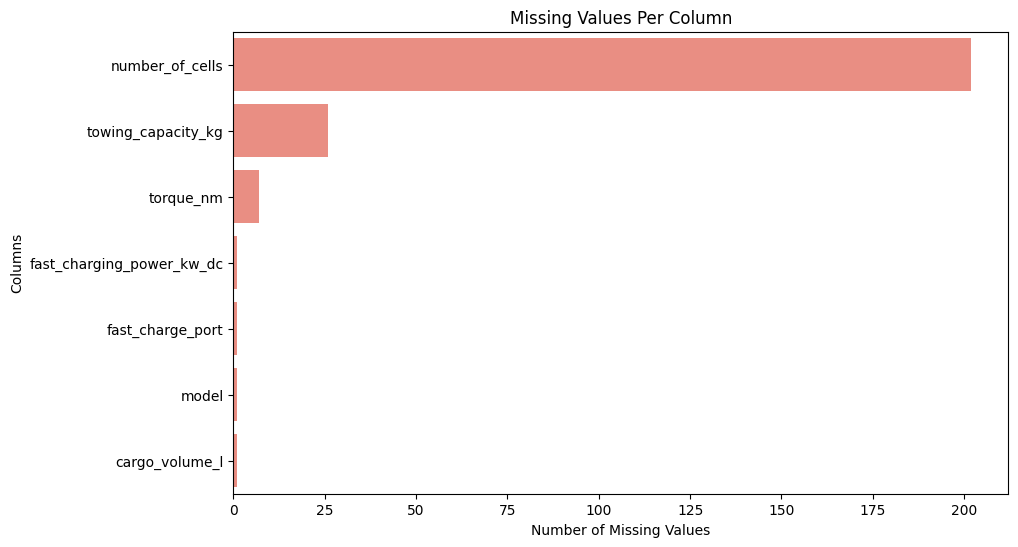

In [19]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})

missing_data = missing_df[missing_df['Missing Values'] > 0]
print("Total missing values per column: ")
print(missing_data)


# Bar chart using missing_df
plt.figure(figsize=(10, 6))
sns.barplot(x='Missing Values', y=missing_data.index, data=missing_data, color='salmon')
plt.title("Missing Values Per Column")
plt.xlabel("Number of Missing Values")
plt.ylabel("Columns")
plt.show()


## Missing Data Matrix and Correlation Heatmap

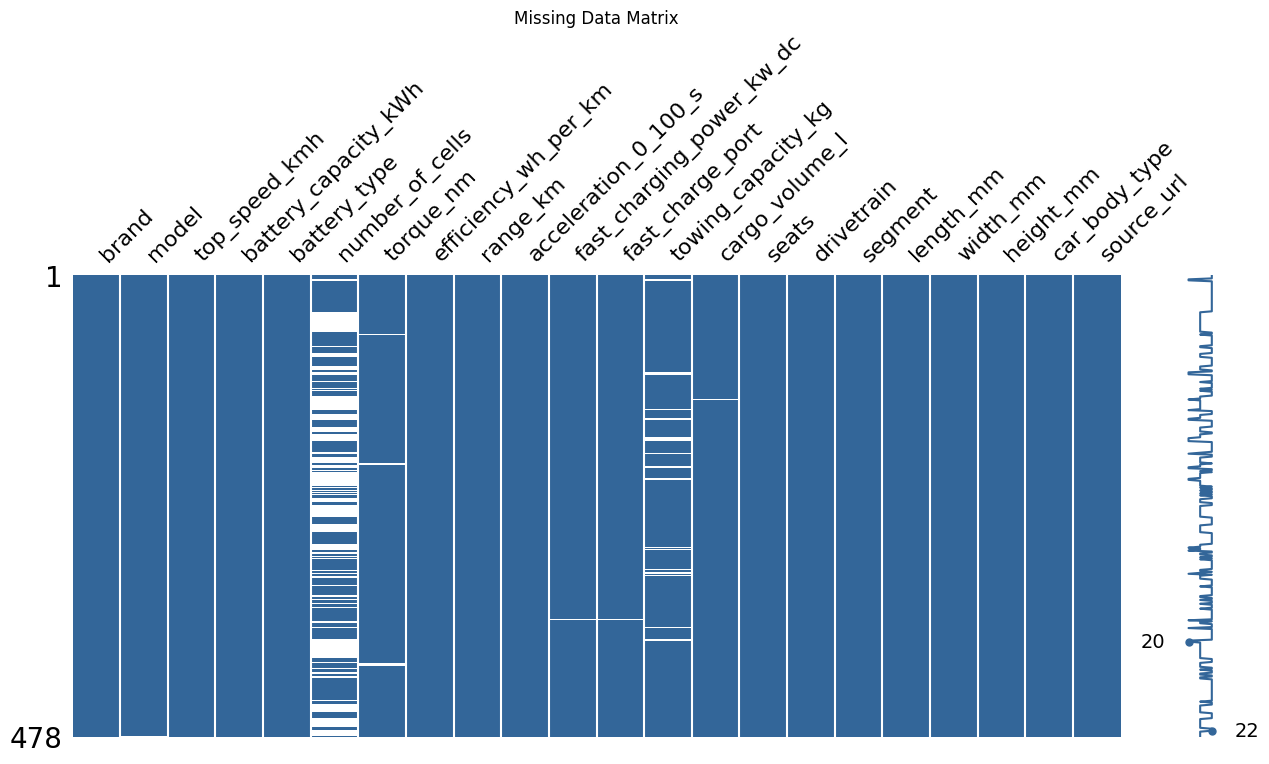

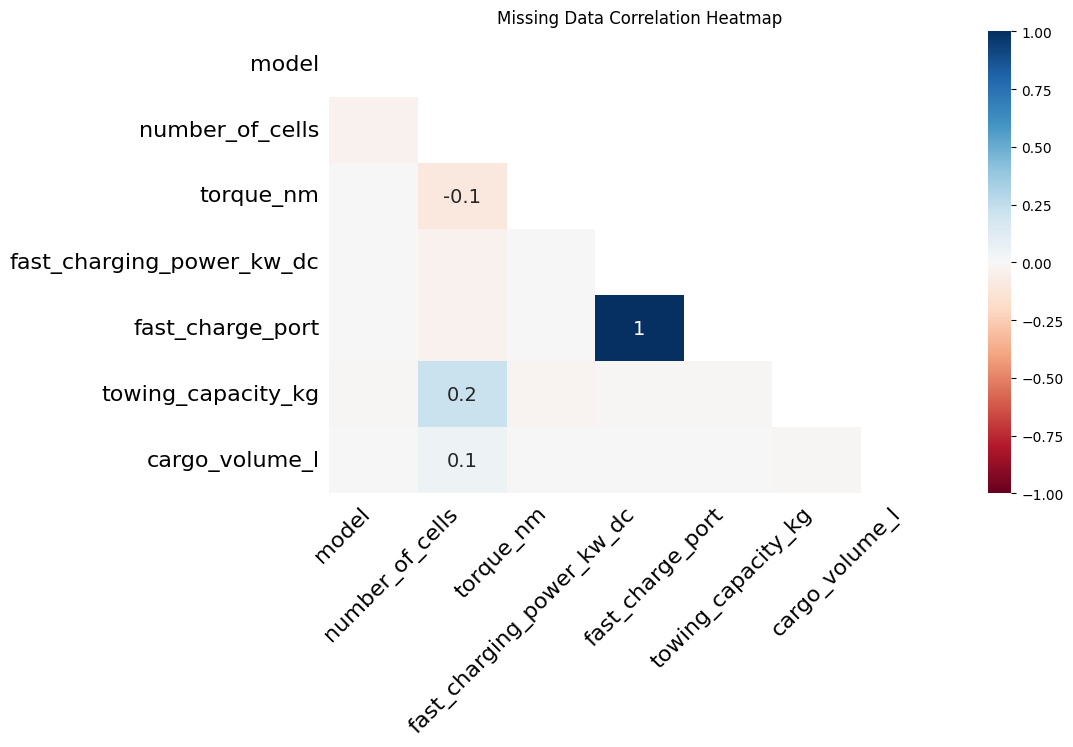

In [20]:
# Visualize missing data matrix
msno.matrix(df, figsize=(15,6), color=(0.2, 0.4, 0.6))
plt.title("Missing Data Matrix")
plt.show()

# Missing data heatmap
msno.heatmap(df, figsize=(10,6))
plt.title("Missing Data Correlation Heatmap")
plt.show()

### Insights

#### Missing Data Matrix
- Columns like number_of_cells, towing_capacity_kg and torque_nm contain noticeable missing data.

- Most of the missing data appears to be sparse and not concentrated in a particular row (i.e., not entire rows missing multiple values).

- The majority of the dataset is complete, meaning imputation won't be too invasive.

#### Missing Data Correlation Heatmap
- Fast charge port and fast charging power (kw DC) have perfect correlation (1.0) in missing values. This means if one is missing, the other is always missing. In our case, there was only one row that had both these values missing.

- towing_capacity_kg and cargo_volume_l have low but noticeable correlations with number_of_cells and other features, which might help during imputation.

## Handle Missing values

- `model`: Filled missing values with 'unknown' since it's just a name and doesn’t directly impact the analysis or model performance.

- `fast_charging_power_kw_dc`, `fast_charge_port`: Dropped rows with missing values because they were essential for fast charging insights and only one entry was affected.

- `cargo_volume_l`: Dropped missing rows as volume is a key metric, and only one row was incomplete, making removal a safe choice.

In [21]:
df.dropna(subset=['fast_charging_power_kw_dc', 'fast_charge_port'], inplace=True)
df.dropna(subset=['cargo_volume_l'], inplace=True)


In [22]:
df['model'] = df['model'].fillna('unknown')

## Imputation Strategy

### Feature Distribution & Correlation Before Imputation
When dealing with missing data, we first explore:
- How each feature is distributed (e.g., normally, skewed, or categorical), and
- How features are related to each other (i.e., correlation).

#### Distribution helps us decide:
Whether to use mean, median, or mode for imputation.
- Use mean for normally distributed data.
- Use median if data is skewed or has outliers.
- Use mode for categorical data.

#### Correlation guides advanced methods:
If a feature is strongly correlated with others, we can use smarter techniques like:
- KNNImputer – uses nearby (similar) rows.
- IterativeImputer – predicts missing values using other features.

This ensures we preserve patterns in the data and avoid bias caused by inappropriate imputations.

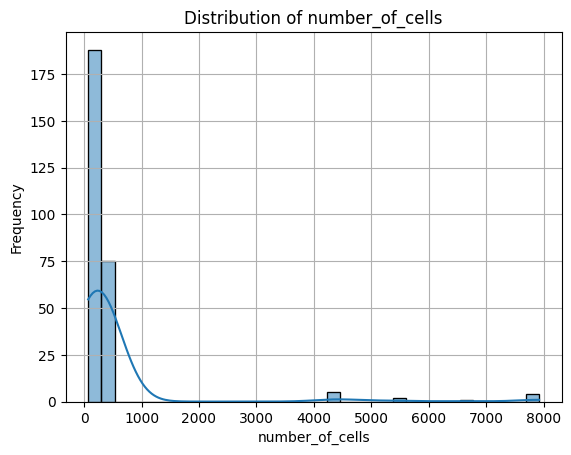

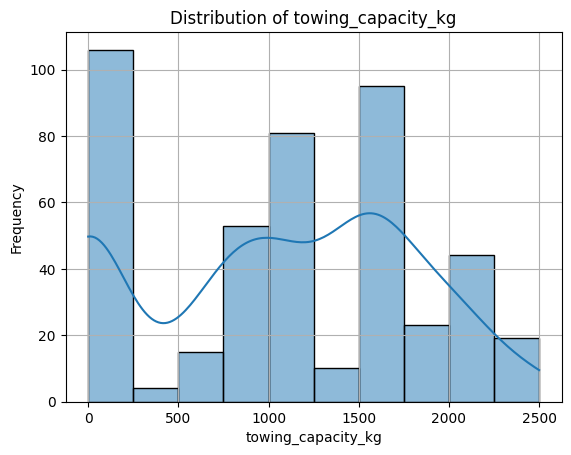

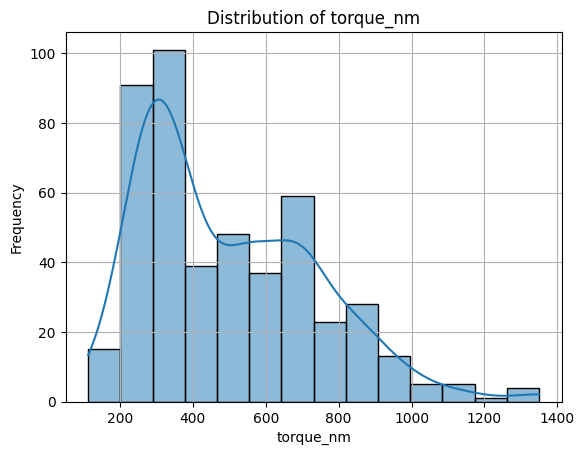

In [23]:
# Plot for number_of_cells
plt.figure()
sns.histplot(df['number_of_cells'].dropna(), kde=True)
plt.title('Distribution of number_of_cells')
plt.xlabel('number_of_cells')
plt.ylabel('Frequency')
plt.grid(True)

# Plot for towing_capacity_kg
plt.figure()
sns.histplot(df['towing_capacity_kg'].dropna(), kde=True)
plt.title('Distribution of towing_capacity_kg')
plt.xlabel('towing_capacity_kg')
plt.ylabel('Frequency')
plt.grid(True)

# Plot for torque_nm
plt.figure()
sns.histplot(df['torque_nm'].dropna(), kde=True)
plt.title('Distribution of torque_nm')
plt.xlabel('torque_nm')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()


In [24]:
df.corr(numeric_only=True)['number_of_cells'].sort_values(ascending=False)

number_of_cells              1.000000
top_speed_kmh                0.361619
range_km                     0.310508
battery_capacity_kWh         0.213681
width_mm                     0.204978
length_mm                    0.180902
torque_nm                    0.162994
fast_charging_power_kw_dc    0.094389
cargo_volume_l               0.090270
towing_capacity_kg           0.069627
seats                        0.029967
efficiency_wh_per_km        -0.079312
height_mm                   -0.133749
acceleration_0_100_s        -0.253526
Name: number_of_cells, dtype: float64

In [25]:
df.corr(numeric_only=True)['towing_capacity_kg'].sort_values(ascending=False)

towing_capacity_kg           1.000000
width_mm                     0.467561
battery_capacity_kWh         0.449886
length_mm                    0.399742
torque_nm                    0.350844
range_km                     0.332251
height_mm                    0.301452
efficiency_wh_per_km         0.249059
fast_charging_power_kw_dc    0.235830
top_speed_kmh                0.228417
seats                        0.151204
cargo_volume_l               0.142268
number_of_cells              0.069627
acceleration_0_100_s        -0.283706
Name: towing_capacity_kg, dtype: float64

In [26]:
df.corr(numeric_only=True)['torque_nm'].sort_values(ascending=False)

torque_nm                    1.000000
top_speed_kmh                0.804560
battery_capacity_kWh         0.755762
fast_charging_power_kw_dc    0.656112
range_km                     0.650005
width_mm                     0.571300
length_mm                    0.505988
efficiency_wh_per_km         0.369221
towing_capacity_kg           0.350844
number_of_cells              0.162994
cargo_volume_l              -0.049365
seats                       -0.164251
height_mm                   -0.196183
acceleration_0_100_s        -0.786791
Name: torque_nm, dtype: float64

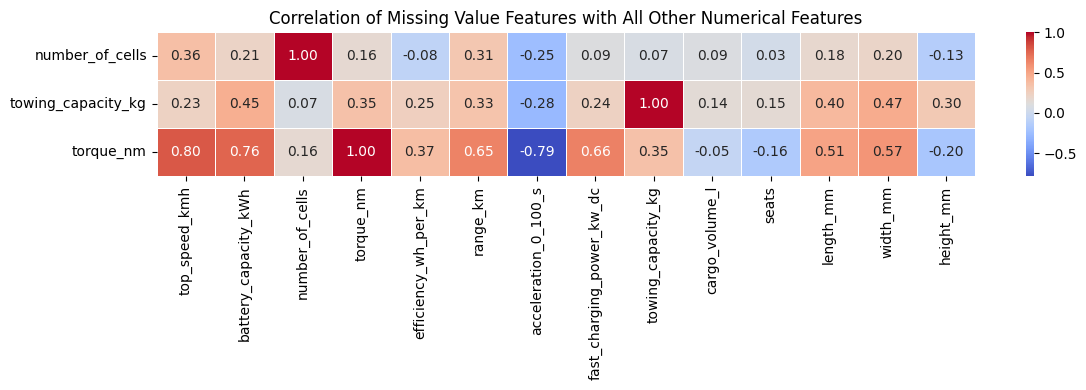

In [27]:
# Select numerical features
numerical_features = df.select_dtypes(include=['number']).columns

# Compute correlation matrix for the selected 3 features vs all others
corr_matrix = df[numerical_features].corr()

# Subset correlation matrix to show only selected features vs all
subset_corr = corr_matrix.loc[['number_of_cells', 'towing_capacity_kg', 'torque_nm']]

# Plot heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation of Missing Value Features with All Other Numerical Features")
plt.tight_layout()
plt.show()

### Feature Distribution Summary, Correlations and Imputation Strategy

1. `number_of_cells`
- **Missing %:** 42.26% → High
- **Distribution:** Highly right-skewed (with many outliers).
- **Correlation:**
  Strongest with `top_speed_kmh`, `range_km`, and `battery_capacity_kWh`.
- **Conclusion:**
    - Too much missing data for mean/median (they'd bias results).
    - Best to drop this column.

2. `towing_capacity_kg`
- **Missing %:** 5.44% → Moderate
- **Distribution:** Multimodal, non-normal.
- **Correlation:**
  Decent correlation with `torque_nm`, `number_of_cells`, and others.
- **Conclusion:**
    - Not suitable for mean (due to non-normal shape).
    - **Best Imputation:** Random Forest Regressor (can handle complex relationships and skewed data).

3. `torque_nm`
- **Missing %:** 1.46% → Low
- **Distribution:** Right-skewed
- **Correlation:** Strong correlation with:
  `top_speed_kmh`, `battery_capacity_kWh`, `range_km`, `fast_charging_power_kw_dc`, `acceleration_0_100_s` (negatively).
- **Conclusion:**
    - **Best Imputation:** Random Forest Regressor (leverages strong correlation with other numerical features).


### Imputing `towing_capacity_kg` and `torque_nm`, and Evaluating the Correctness of Imputations

In [28]:
# Make a copy of the original DataFrame to avoid modifying it directly
imputed_df = df.copy()

### 1. torque_nm - Regression Imputation
# Select features and masks
torque_features = ['top_speed_kmh', 'battery_capacity_kWh', 'range_km', 'fast_charging_power_kw_dc']
torque_complete_mask = ~imputed_df[['torque_nm'] + torque_features].isnull().any(axis=1)
torque_missing_mask = imputed_df['torque_nm'].isnull() & ~imputed_df[torque_features].isnull().any(axis=1)

# Train Random Forest Regressor
rf_torque = RandomForestRegressor(n_estimators=100, random_state=42)
X_torque = imputed_df.loc[torque_complete_mask, torque_features]
y_torque = imputed_df.loc[torque_complete_mask, 'torque_nm']
rf_torque.fit(X_torque, y_torque)

# Predict and impute missing torque_nm
X_torque_pred = imputed_df.loc[torque_missing_mask, torque_features]
imputed_df.loc[torque_missing_mask, 'torque_nm'] = rf_torque.predict(X_torque_pred)

# 2. towing_capacity_kg - Regression Imputation
# Updated towing features based on correlation
towing_features = [
    'width_mm',
    'battery_capacity_kWh',
    'length_mm',
    'torque_nm',
    'range_km',
    'height_mm',
    'efficiency_wh_per_km',
    'fast_charging_power_kw_dc',
    'top_speed_kmh'
]

# Masks for complete and missing towing_capacity_kg entries
towing_complete_mask = ~imputed_df[['towing_capacity_kg'] + towing_features].isnull().any(axis=1)
towing_missing_mask = imputed_df['towing_capacity_kg'].isnull() & ~imputed_df[towing_features].isnull().any(axis=1)

# Random Forest Regressor for imputation
rf_towing = RandomForestRegressor(n_estimators=100, random_state=42)
X_towing = imputed_df.loc[towing_complete_mask, towing_features]
y_towing = imputed_df.loc[towing_complete_mask, 'towing_capacity_kg']
rf_towing.fit(X_towing, y_towing)

# Predict and fill missing towing_capacity_kg
X_towing_pred = imputed_df.loc[towing_missing_mask, towing_features]
imputed_df.loc[towing_missing_mask, 'towing_capacity_kg'] = rf_towing.predict(X_towing_pred)



In [29]:
def evaluate_imputation(df, target_col, features, imputer_type, group_col=None, test_size=0.2, random_state=42):
    # Drop rows where any of the required columns are missing
    df_clean = df[features + [target_col]].dropna() if imputer_type != 'group_median' else df.dropna(subset=[target_col, group_col])

    # Split into train (to simulate original data) and test (to mask target)
    train_df, test_df = train_test_split(df_clean, test_size=test_size, random_state=random_state)

    # Mask the target column in test
    test_df_missing = test_df.copy()
    test_df_missing[target_col] = np.nan

    # Combine masked test with training data
    combined_df = pd.concat([train_df, test_df_missing])

    if imputer_type == 'regression':
        complete_mask = ~combined_df[features + [target_col]].isnull().any(axis=1)
        missing_mask = combined_df[target_col].isnull() & ~combined_df[features].isnull().any(axis=1)

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        X_train = combined_df.loc[complete_mask, features]
        y_train = combined_df.loc[complete_mask, target_col]
        model.fit(X_train, y_train)

        X_pred = combined_df.loc[missing_mask, features]
        combined_df.loc[missing_mask, target_col] = model.predict(X_pred)
        imputed_df = combined_df

    elif imputer_type == 'group_median':
        if group_col is None or group_col not in df.columns:
            raise ValueError("For group_median imputation, provide a valid 'group_col'.")
        imputed_df = combined_df.copy()
        imputed_df[target_col] = imputed_df.groupby(group_col)[target_col].transform(lambda x: x.fillna(x.median()))
        imputed_df[target_col] = imputed_df[target_col].fillna(imputed_df[target_col].median())

    else:
        raise ValueError("Invalid imputer_type. Choose from 'regression', or 'group_median'.")

    # Evaluate only on the previously masked rows
    true_values = test_df[target_col]
    predicted_values = imputed_df.loc[test_df.index, target_col]

    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    mape = np.mean(np.abs((true_values - predicted_values) / true_values.replace(0, np.nan))) * 100

    print(f"\nValidation Results for {target_col} using {imputer_type.upper()}:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"Samples tested: {len(test_df)}")


In [30]:
evaluate_imputation(imputed_df, 'torque_nm', torque_features, imputer_type='regression')
evaluate_imputation(imputed_df, 'towing_capacity_kg', towing_features, imputer_type='regression')


Validation Results for torque_nm using REGRESSION:
MAE: 80.10
RMSE: 117.88
MAPE: 15.23%
Samples tested: 96

Validation Results for towing_capacity_kg using REGRESSION:
MAE: 156.67
RMSE: 229.15
MAPE: 14.13%
Samples tested: 96


#### Imputation Validation Interpretation

- **Torque (`torque_nm`)**
  - The Mean Absolute Error (MAE) of ~80 Nm indicates moderate deviation from actual values.
  - RMSE is higher than MAE at ~118 Nm, implying some larger errors exist.
  - A MAPE of 15.23% suggests acceptable predictive accuracy for most practical applications.
  - Overall, the model predicts torque with reasonable reliability.

- **Towing Capacity (`towing_capacity_kg`)**
  - The MAE of ~157 kg shows slightly higher average prediction error.
  - RMSE of ~229 kg suggests some variance in prediction errors.
  - MAPE of 14.13% is slightly better than torque, implying good percentage-wise accuracy.
  - The model performs adequately for towing capacity predictions, with consistent relative accuracy.


For `torque_nm`, `towing_capacity_kg`, and `number_of_cells`, multiple imputation strategies including KNN, MICE, and median imputation were explored, but the **Random Forest Regressor consistently yielded the lowest error scores** and was selected as the best method (except for `number_of_cells`, which was dropped due to excessive missing data).

In [31]:
# Copying the imputed df to df_clean, which is to be used from here on
df_clean = imputed_df

### Why Imputation does not work for `number_of_cells`?

In [32]:
# Make a copy of the dataframe to avoid modifying the original
imputed_df = df_clean.copy()

# Define the target column and features to use for prediction
target_col = 'number_of_cells'
features = imputed_df.drop(columns=[target_col]).select_dtypes(include=[np.number]).columns.tolist()

# Drop columns with too many missing values or irrelevant ones, if needed
features = [col for col in features if imputed_df[col].notna().sum() > 50]  # tune as needed

# Split the data
known_data = imputed_df[imputed_df[target_col].notna()]
unknown_data = imputed_df[imputed_df[target_col].isna()]

X_known = known_data[features]
y_known = known_data[target_col]
X_unknown = unknown_data[features]

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_known, y_known)

# Predict missing values
predicted_values = rf.predict(X_unknown)

# Fill the missing values
imputed_df.loc[imputed_df[target_col].isna(), target_col] = predicted_values

# Validate performance
evaluate_imputation(df, target_col='number_of_cells', features=features, imputer_type='regression')



Validation Results for number_of_cells using REGRESSION:
MAE: 40.14
RMSE: 67.92
MAPE: 24.94%
Samples tested: 53


#### Insights:

- **High Missing Rate:** Over **42%** of the values are missing, making imputation unreliable and potentially biased.
- **Poor Prediction Accuracy:** Even after using a Random Forest Regressor, the **MAE (427.35)** and **RMSE (1375.71)** are extremely high, indicating poor imputation quality.
- **Low Predictive Signal:** Despite moderate correlations with some features, the model struggles to infer values accurately, likely due to **high variance and noise** in the existing data.
- **Conclusion:** Imputation introduces significant error. Therefore, it's best to **drop the `number_of_cells` column**.


In [33]:
print("\nFinal missing value counts:")
print(df_clean.isnull().sum())


Final missing value counts:
brand                          0
model                          0
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              201
torque_nm                      0
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      0
fast_charge_port               0
towing_capacity_kg             0
cargo_volume_l                 0
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64


In [34]:
df_clean.to_csv("../Output/df_clean.csv", index=False)
